# 0-) IMPORTS

In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf


from tensorflow.keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers   import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import VGG16

from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report

import warnings
warnings.filterwarnings("ignore")

# 1-) DATA ANALYSIS

In [4]:
#load data
dataset = "Drug Vision/Data Combined"
image_dir = Path(dataset)

filepaths = list(image_dir.glob(r"**/*.jpg")) + list(image_dir.glob(r"**/*.png"))
labels    = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths,name="filepath").astype("str")
labels    = pd.Series(labels,name="labels")

image_df  = pd.concat([filepaths,labels],axis=1)

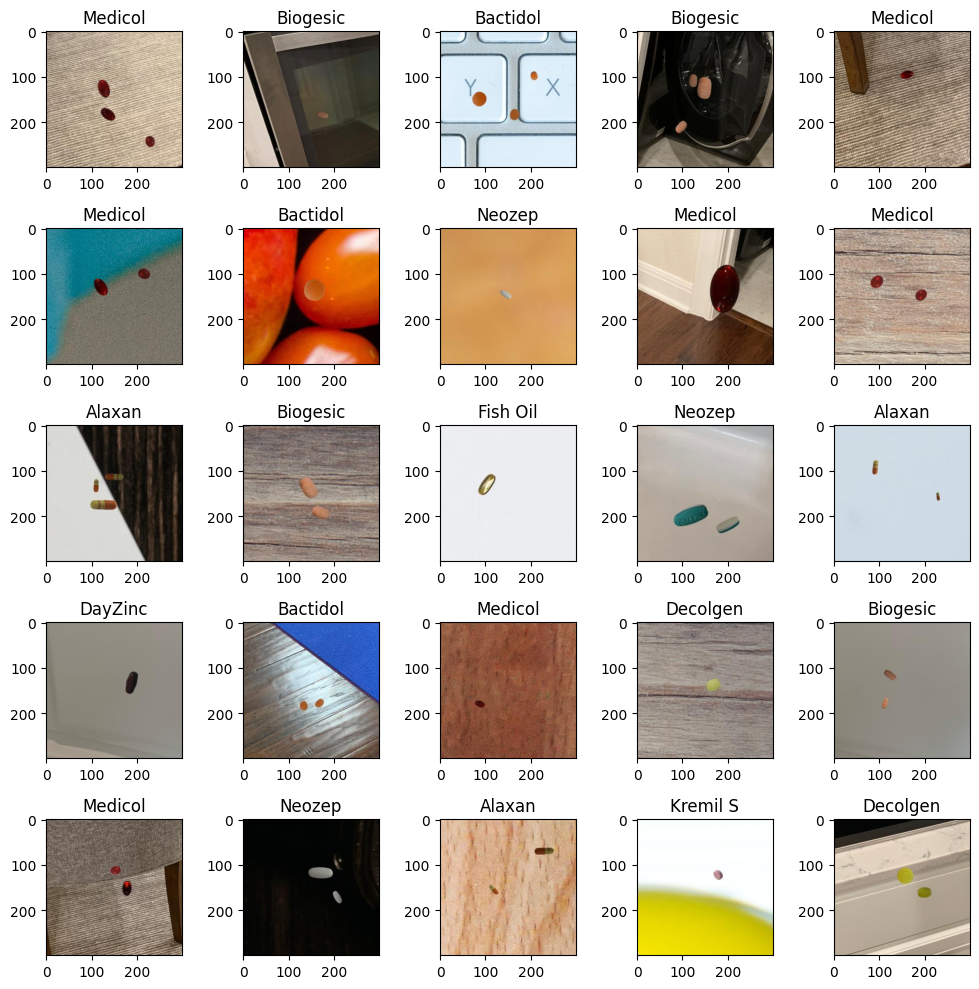

In [8]:
#Data Visualization
random_index = np.random.randint(0,len(image_df),25)

fig, axes = plt.subplots(nrows=5,ncols=5,figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.filepath[random_index[i]]))
    ax.set_title(image_df.labels[random_index[i]])
plt.tight_layout()

In [10]:
#train test split
train_df, test_df=train_test_split(image_df,test_size=0.2,random_state=42, shuffle=True)

print(f"len of train set: {len(train_df)}")
print(f"len of test  set: {len(test_df)}")

len of train set: 8000
len of test  set: 2000


In [11]:
# Data augmentation
train_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                     validation_split=0.2)
test_generator  = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# 2-) MODELLING

## A-) ENCODER AND DECODER

## C-) Model Training

# 3-) TESTING

In [ ]:
#peak-snr
def calculate_psnr(original, reconstructed):
    mse = np.mean((original-reconstructed)**2)
    if mse == 0:
        return float("inf") #if exact same psnr=infinity
    max_pixel =1.0
    psnr = 20*np.log10(max_pixel/np.sqrt(mse))
    return psnr